## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 10 is due on 5/15/2025

# Missing Data

Load up the Boston Housing Data and separate into matrix `X` for the features and vector `y` for the response. Randomize the rows

In [30]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

#Load the Boston housing data from the provided URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)


#This creates a full set of predictors for each observation.
X_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

#The response y is stored in the third column of the second row of each pair.
y = raw_df.values[1::2, 2]

#Add an intercept column (like R's model.matrix does automatically)
X = sm.add_constant(X_data)

#Define column names using the provided names
col_names = np.concatenate((["Intercept"], 
                            ["CRIM", "ZN", "INDUS", "CHAS", "NOX", 
                             "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]))

# Convert the numpy arrays to pandas DataFrames with column names
X_df = pd.DataFrame(X, columns=col_names)
y_df = pd.DataFrame(y, columns=["medv"])

#  the dimensions to verify
print("Number of predictors (including intercept):", X_df.shape[1])
print("Number of observations:", X_df.shape[0])

#Display the first few rows of the DataFrames
print(X_df.head())
print(y_df.head())

Number of predictors (including intercept): 14
Number of observations: 506
   Intercept     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0        1.0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1        1.0  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2        1.0  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3        1.0  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4        1.0  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  
0  296.0     15.3  396.90   4.98  
1  242.0     17.8  396.90   9.14  
2  242.0     17.8  392.83   4.03  
3  222.0     18.7  394.63   2.94  
4  222.0     18.7  396.90   5.33  
   medv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [31]:
combined_df = pd.concat((X_df, y_df), axis=1)
combined_df

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [32]:
#Randomize the rows by shuffling the indices
shuffled_indices = np.random.permutation(len(combined_df))
combined_df = combined_df.loc[shuffled_indices]
combined_df

,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
231,1.0,0.46296,0.0,6.20,0.0,0.504,7.412,76.9,3.6715,8.0,307.0,17.4,376.14,5.25,31.7
92,1.0,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,22.9
25,1.0,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51,13.9
228,1.0,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92,46.7
369,1.0,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1.0,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85,32.2
41,1.0,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
136,1.0,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90,17.4


In [33]:
#This removes the 'medv' column from combined_df and returns it as a Series, which we then convert to a DataFrame.
y_df = pd.DataFrame(combined_df['medv'])
X_df = combined_df.drop('medv', axis=1)

print(type(y_df))
X_df

<class 'pandas.core.frame.DataFrame'>


,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
231,1.0,0.46296,0.0,6.20,0.0,0.504,7.412,76.9,3.6715,8.0,307.0,17.4,376.14,5.25
92,1.0,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
25,1.0,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
228,1.0,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92
369,1.0,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1.0,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85
41,1.0,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
136,1.0,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90


Similar to lab 1, write a function that takes a matrix and punches holes (i.e. sets entries equal to `NA`) randomly with an argument `prob_missing`

In [34]:
def punch_holes(matrix, prob_missing):
    """
    Randomly sets entries in a matrix to NA based on the given probability.

    Parameters:
    -----------
    matrix : pandas.DataFrame or numpy.ndarray
        The input matrix in which to punch holes.
    prob_missing : float
        The probability (between 0 and 1) that any given entry is set to NA.

    Returns:
    --------
    matrix_with_holes : same type as input
        A copy of the original matrix with entries randomly set to NA.
    """
    #Create a boolean mask with True values where we want to set NA
    mask = np.random.choice([True, False], size=matrix.shape, p=[prob_missing, 1 - prob_missing])
    
    #If matrix is a DataFrame, make a copy and set the mask locations to np.nan
    if isinstance(matrix, pd.DataFrame):
        matrix_with_holes = matrix.copy()
        matrix_with_holes[mask] = np.nan
    #If matrix is a numpy array, copy it and set the mask locations to np.nan
    elif isinstance(matrix, np.ndarray):
        matrix_with_holes = matrix.copy()
        #If the array has an integer dtype, convert to float so it can hold np.nan
        if np.issubdtype(matrix_with_holes.dtype, np.integer):
            matrix_with_holes = matrix_with_holes.astype(float)
        matrix_with_holes[mask] = np.nan
    else:
        raise TypeError("Input must be a pandas DataFrame or a numpy array")
    
    return matrix_with_holes

Create a matrix `Xmiss` which is `X` but has missingness with probability of 10% using the function you just wrote. 

In [35]:
#Create Xmiss by introducing 10% missingness using the punch_holes function:
Xmiss = punch_holes(X_df, 0.1)

#Display Xmiss to verify the missing entries
print("Matrix X with 10% missing values:")
print(Xmiss)

Matrix X with 10% missing values:
     Intercept     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD  \
231        1.0  0.46296   0.0   6.20   0.0    NaN  7.412  76.9  3.6715   8.0   
92         1.0  0.04203  28.0  15.04   0.0  0.464  6.442   NaN  3.6659   4.0   
25         1.0  0.84054   NaN   8.14   0.0  0.538  5.599  85.7  4.4546   4.0   
228        1.0  0.29819   0.0   6.20   0.0    NaN  7.686  17.0  3.3751   8.0   
369        1.0  5.66998   NaN  18.10   NaN  0.631  6.683  96.8  1.3567  24.0   
..         ...      ...   ...    ...   ...    ...    ...   ...     ...   ...   
284        1.0  0.00906  90.0   2.97   NaN  0.400  7.088  20.8  7.3073   1.0   
41         1.0  0.12744   0.0   6.91   0.0  0.448  6.770   2.9  5.7209   3.0   
3          1.0  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622   3.0   
136        1.0  0.32264   0.0  21.89   0.0  0.624  5.942  93.5  1.9669   4.0   
22         1.0  1.23247   0.0    NaN   0.0  0.538  6.142   NaN  3.9769   4.0   

     

Also, generate the M matrix and delete columns that have no missingness.

In [36]:
#Create the indicator matrix M: Each entry in M is 1 if the corresponding entry in Xmiss is NA, and 0 otherwise.
M = Xmiss.isna().astype(int)

#Rename the columns of M by prefixing "is_missing_" to the original column names.
M.columns = Xmiss.columns + '_is_missing'

#Delete (i.e. drop) columns that have no missingness (columns whose sum is 0).
M = M.loc[:, M.sum()>0]

#print M to verify
print("Indicator matrix M (only columns with missing values):")
print(M)

Indicator matrix M (only columns with missing values):
     Intercept_is_missing  CRIM_is_missing  ZN_is_missing  INDUS_is_missing  \
231                     0                0              0                 0   
92                      0                0              0                 0   
25                      0                0              1                 0   
228                     0                0              0                 0   
369                     0                0              1                 0   
..                    ...              ...            ...               ...   
284                     0                0              0                 0   
41                      0                0              0                 0   
3                       0                0              0                 0   
136                     0                0              0                 0   
22                      0                0              0                 1 

Split the first 400 observations were the training data and the remaining observations are the test set. For Xmiss, cbind on the M so the model has a chance to fit on "is missing" as we discussed in class

In [37]:
from sklearn.model_selection import train_test_split

#Combine Xmiss and M (column-wise, similar to R's cbind)
Xmiss_with_M = pd.concat((Xmiss, M), axis=1)

#Split the data: The first 400 observations will be the training set,The remaining observations will be the test set.
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, train_size=400)

#Do the same for the combined Xmiss_with_M:
Xmiss_train, Xmiss_test, _, _ = train_test_split(Xmiss_with_M, y_df, train_size=400)

#Verify the shapes
print("X_train shape:", X_train.shape)
print("Xmiss_train shape:", Xmiss_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("Xmiss_test shape:", Xmiss_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 14)
Xmiss_train shape: (400, 28)
y_train shape: (400, 1)
X_test shape: (106, 14)
Xmiss_test shape: (106, 28)
y_test shape: (106, 1)


Fit a random forest model of `y_train ~ X_train`, report oos s_e (not oob) on `X_test`. This ignores missingness

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Instantiate and fit the random forest model on X_train and y_train
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#Predict on the test set
y_pred = rf.predict(X_test)

#Compute the out-of-sample standard error (root mean squared error)
oos_se = np.sqrt(mean_squared_error(y_test, y_pred))
print("Out-of-sample standard error (RMSE):", oos_se)

C:\Users\sneeky\AppData\Local\Temp\ipykernel_9960\2576664470.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Out-of-sample standard error (RMSE): 2.9022897320355945


Impute the missingness in `Xmiss` using the feature averages to create a matrix `Ximp_naive_train` and `Ximp_naive_test`

In [39]:
from sklearn.impute import SimpleImputer

#Create an imputer that replaces missing values with the column mean
imputer = SimpleImputer(strategy='mean')

#Fit the imputer on the training data and transform it
Ximp_naive_train = pd.DataFrame(imputer.fit_transform(Xmiss_train), columns=Xmiss_train.columns)

#Use the fitted imputer to transform the test data
Ximp_naive_test = pd.DataFrame(imputer.transform(Xmiss_test), columns=Xmiss_test.columns)

#Print a preview to verify
print("Imputed Training Data:")
print(Ximp_naive_train.head())
print("Imputed Test Data:")
print(Ximp_naive_test.head())

Imputed Training Data:
   Intercept      CRIM         ZN  INDUS  CHAS    NOX        RM         AGE  \
0        1.0   0.07978  40.000000   6.41   0.0  0.447  6.482000   67.426989   
1        1.0   0.31533   0.000000   6.20   0.0  0.504  8.266000   78.300000   
2        1.0   9.23230  12.474324  18.10   0.0  0.631  6.305363  100.000000   
3        1.0   0.14052   0.000000  10.59   0.0  0.489  6.375000   32.300000   
4        1.0  14.33370   0.000000  18.10   0.0  0.614  6.229000   88.000000   

      DIS   RAD  ...  CHAS_is_missing  NOX_is_missing  RM_is_missing  \
0  4.1403   4.0  ...              0.0             0.0            0.0   
1  2.8944   8.0  ...              0.0             0.0            0.0   
2  1.1691  24.0  ...              0.0             0.0            1.0   
3  3.9454   4.0  ...              0.0             0.0            0.0   
4  1.9512  24.0  ...              0.0             0.0            0.0   

   AGE_is_missing  DIS_is_missing  RAD_is_missing  TAX_is_missing  \


Fit a random forest model of `y_train ~ Ximp_naive_train`, report oos s_e (not oob) on `Ximp_naive_test`.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Instantiate the random forest regressor
rf_naive = RandomForestRegressor()

#Fit the model on the imputed training data
rf_naive.fit(Ximp_naive_train, y_train)

#Predict on the imputed test data
y_pred_naive = rf_naive.predict(Ximp_naive_test)

#Compute the out-of-sample standard error (using RMSE as the metric)
oos_se_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))
print("Out-of-sample standard error (RMSE):", oos_se_naive)

C:\Users\sneeky\AppData\Local\Temp\ipykernel_9960\3987389467.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_naive.fit(Ximp_naive_train, y_train)


Out-of-sample standard error (RMSE): 9.159925402905442


How much predictive performance was lost due to missingness when naive imputation was used vs when there was no missingness?

In [42]:
print("Complete data model OOS SE (RMSE):", oos_se)
print("Naive imputation model OOS SE (RMSE):", oos_se_naive)

#Calculate the absolute loss in performance (increase in RMSE)
performance_loss = np.abs(oos_se-oos_se_naive)
print("Absolute performance loss (RMSE difference):", performance_loss)

#Calculate the relative performance loss as a percentage
relative_loss = (performance_loss/oos_se)*100
print("Relative performance loss (%):", relative_loss)

Complete data model OOS SE (RMSE): 2.9022897320355945
Naive imputation model OOS SE (RMSE): 9.159925402905442
Absolute performance loss (RMSE difference): 6.257635670869847
Relative performance loss (%): 215.61030250694148


Use `missForest` to impute the missing entries to create a matrix `Ximp_MF_train` and `Ximp_MF_test`.

In [47]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


#Create an IterativeImputer using a RandomForestRegressor as the estimator. This is conceptually similar to missForest.
imputer_MF = IterativeImputer(RandomForestRegressor(), max_iter=10)

#Fit the imputer on the training data and transform it
Ximp_MF_train = pd.DataFrame(imputer_MF.fit_transform(Xmiss_train), columns=Xmiss_train.columns)

#Use the fitted imputer to transform the test data
Ximp_MF_test = pd.DataFrame(imputer_MF.fit_transform(Xmiss_test), columns=Xmiss_test.columns)

#Print a preview to verify
print("Imputed Training Data with MissForest-like Imputation:")
print(Ximp_MF_train.head())
print("Imputed Test Data with MissForest-like Imputation:")
print(Ximp_MF_test.head())

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputed Training Data with MissForest-like Imputation:
   Intercept      CRIM    ZN  INDUS  CHAS    NOX       RM     AGE     DIS  \
0        1.0   0.07978  40.0   6.41   0.0  0.447  6.48200   46.84  4.1403   
1        1.0   0.31533   0.0   6.20   0.0  0.504  8.26600   78.30  2.8944   
2        1.0   9.23230   0.0  18.10   0.0  0.631  5.54303  100.00  1.1691   
3        1.0   0.14052   0.0  10.59   0.0  0.489  6.37500   32.30  3.9454   
4        1.0  14.33370   0.0  18.10   0.0  0.614  6.22900   88.00  1.9512   

    RAD  ...  CHAS_is_missing  NOX_is_missing  RM_is_missing  AGE_is_missing  \
0   4.0  ...              0.0             0.0            0.0             1.0   
1   8.0  ...              0.0             0.0            0.0             0.0   
2  24.0  ...              0.0             0.0            1.0             0.0   
3   4.0  ...              0.0             0.0            0.0             0.0   
4  24.0  ...              0.0             0.0            0.0             0.0   

 

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Code for to handle numerical and categorial columns

In [48]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.base import clone

def missforest_impute(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()

    #Separate columns by dtype
    num_cols = X_train.select_dtypes(include=["number"]).columns
    cat_cols = X_train.select_dtypes(include=["object", "category", "bool"]).columns

    #Encode categorical columns
    cat_maps = {}
    for col in cat_cols:
        categories = X_train[col].astype("category").cat.categories
        cat_maps[col] = categories
        X_train[col] = X_train[col].astype("category").cat.codes.replace(-1, np.nan)
        X_test[col] = pd.Categorical(X_test[col], categories=categories).codes
        X_test[col] = X_test[col].replace(-1, np.nan)

    # Impute numerical columns
    if len(num_cols) > 0:
        imputer_num = IterativeImputer(
            estimator=RandomForestRegressor(n_estimators=10, random_state=0),
            max_iter=10,
            random_state=0
        )
        X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
        X_test[num_cols] = imputer_num.transform(X_test[num_cols])

    #Impute categorical columns
    if len(cat_cols) > 0:
        imputer_cat = IterativeImputer(
            estimator=RandomForestClassifier(n_estimators=10, random_state=0),
            max_iter=10,
            random_state=0
        )
        X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
        X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])

        #Round, convert to int, and map back to original categories
        for col in cat_cols:
            X_train[col] = X_train[col].round().astype(int)
            X_test[col] = X_test[col].round().astype(int)
            X_train[col] = pd.Categorical.from_codes(X_train[col], cat_maps[col])
            X_test[col] = pd.Categorical.from_codes(X_test[col], cat_maps[col])

    return X_train, X_test

#Example usage
Ximp_train, Ximp_test = missforest_impute(Xmiss_train, Xmiss_test)

#Preview
print("Imputed Training Data:")
print(Ximp_train.head())
print("Imputed Test Data:")
print(Ximp_test.head())

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputed Training Data:
     Intercept      CRIM    ZN  INDUS  CHAS    NOX      RM     AGE     DIS  \
278        1.0   0.07978  40.0   6.41   0.0  0.447  6.4820   48.67  4.1403   
224        1.0   0.31533   0.0   6.20   0.0  0.504  8.2660   78.30  2.8944   
371        1.0   9.23230   0.0  18.10   0.0  0.631  5.8694  100.00  1.1691   
213        1.0   0.14052   0.0  10.59   0.0  0.489  6.3750   32.30  3.9454   
479        1.0  14.33370   0.0  18.10   0.0  0.614  6.2290   88.00  1.9512   

      RAD  ...  CHAS_is_missing  NOX_is_missing  RM_is_missing  \
278   4.0  ...              0.0             0.0            0.0   
224   8.0  ...              0.0             0.0            0.0   
371  24.0  ...              0.0             0.0            1.0   
213   4.0  ...              0.0             0.0            0.0   
479  24.0  ...              0.0             0.0            0.0   

     AGE_is_missing  DIS_is_missing  RAD_is_missing  TAX_is_missing  \
278             1.0             0.0     

Fit a random forest model of `y_train ~ Ximp_MF_train`, report oos s_e (not oob) on `Ximp_MF_test`.

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Instantiate the random forest regressor
rf_MF = RandomForestRegressor()

#Fit the model on the missForest-imputed training data
rf_MF.fit(Ximp_MF_train, y_train)

#Predict on the missForest-imputed test data
y_pred_MF = rf_MF.predict(Ximp_MF_test)

#Compute the out-of-sample standard error (using RMSE as the metric)
oos_se_MF = np.sqrt(mean_squared_error(y_test, y_pred_MF))
print("Out-of-sample standard error (RMSE) for missForest-imputed data:", oos_se_MF)

C:\Users\sneeky\AppData\Local\Temp\ipykernel_9960\3213725278.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_MF.fit(Ximp_MF_train, y_train)


Out-of-sample standard error (RMSE) for missForest-imputed data: 9.164845785071941


How much predictive performance was lost due to missingness when `missForest` imputation was used?

In [50]:
print("Complete data model OOS SE (RMSE):", oos_se)
print("missForest-imputed model OOS SE (RMSE):", oos_se_MF)

# Calculate the absolute loss in performance (increase in RMSE)
performance_loss_MF = oos_se_MF - oos_se
print("Absolute performance loss (RMSE difference):", performance_loss_MF)

# Calculate the relative performance loss as a percentage
relative_loss_MF = (performance_loss_MF / oos_se) * 100
print("Relative performance loss (%):", relative_loss_MF)

Complete data model OOS SE (RMSE): 2.9022897320355945
missForest-imputed model OOS SE (RMSE): 9.164845785071941
Absolute performance loss (RMSE difference): 6.262556053036347
Relative performance loss (%): 215.77983699938684


Why did `missForest` imputation perform better than naive imputation?

Answer: Performing better than the baseline is the bare minimum for any useful model. The missForest function uses a random forest which attemps to split the data into groups. This splitting informs the imputed values to fit the data better than simply using the average value. Then, these imputed values cause a better performance for the final model. 

Reload the feature matrix:

In [51]:
print(y_df)
X_df

     medv
231  31.7
92   22.9
25   13.9
228  46.7
369  50.0
..    ...
284  32.2
41   26.6
3    33.4
136  17.4
22   15.2

[506 rows x 1 columns]


,Intercept,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
231,1.0,0.46296,0.0,6.20,0.0,0.504,7.412,76.9,3.6715,8.0,307.0,17.4,376.14,5.25
92,1.0,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
25,1.0,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
228,1.0,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92
369,1.0,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1.0,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85
41,1.0,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
136,1.0,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90


## Bagged Trees and Random Forest

Take a training sample of n = 2000 observations from the diamonds data.

In [52]:
from plotnine.data import diamonds

#Load the diamonds dataset from plotnine
diamonds_df = diamonds

#Display the first few rows to verify the data
print(diamonds_df.head())

#Take a random training sample of 2000 observations from the dataset
sample_df = diamonds_df.sample(2000)

#Define the predictor matrix (X_df) and the response vector (y_df) Assuming 'price' is the response variable and all other columns are predictors.
X_df = sample_df.drop(columns='price')
y_df = sample_df['price']

#Reset the index
X_train = X_df.reset_index(drop=True)
y_train = y_df.reset_index(drop=True)

#Verify the shapes of the training sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
X_train shape: (2000, 9)
y_train shape: (2000,)


Using the diamonds data, find the oob s_e for a bagged-tree model using 1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000 trees. If you are using the `randomForest` package, you can create the bagged tree model via setting an argument within the RF constructor function. Plot.

X_train shape: (2000, 9)
y_train shape: (2000,)


c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


    n_trees     oob_rmse
0         1  4440.402432
1         2  3675.595747
2         5  1866.216694
3        10  1140.504294
4        20   886.019024
5        30   870.449751
6        40   831.952090
7        50   835.854111
8       100   817.593725
9       200   815.024897
10      300   812.786195
11      400   812.046063
12      500   811.951412
13     1000   806.409968


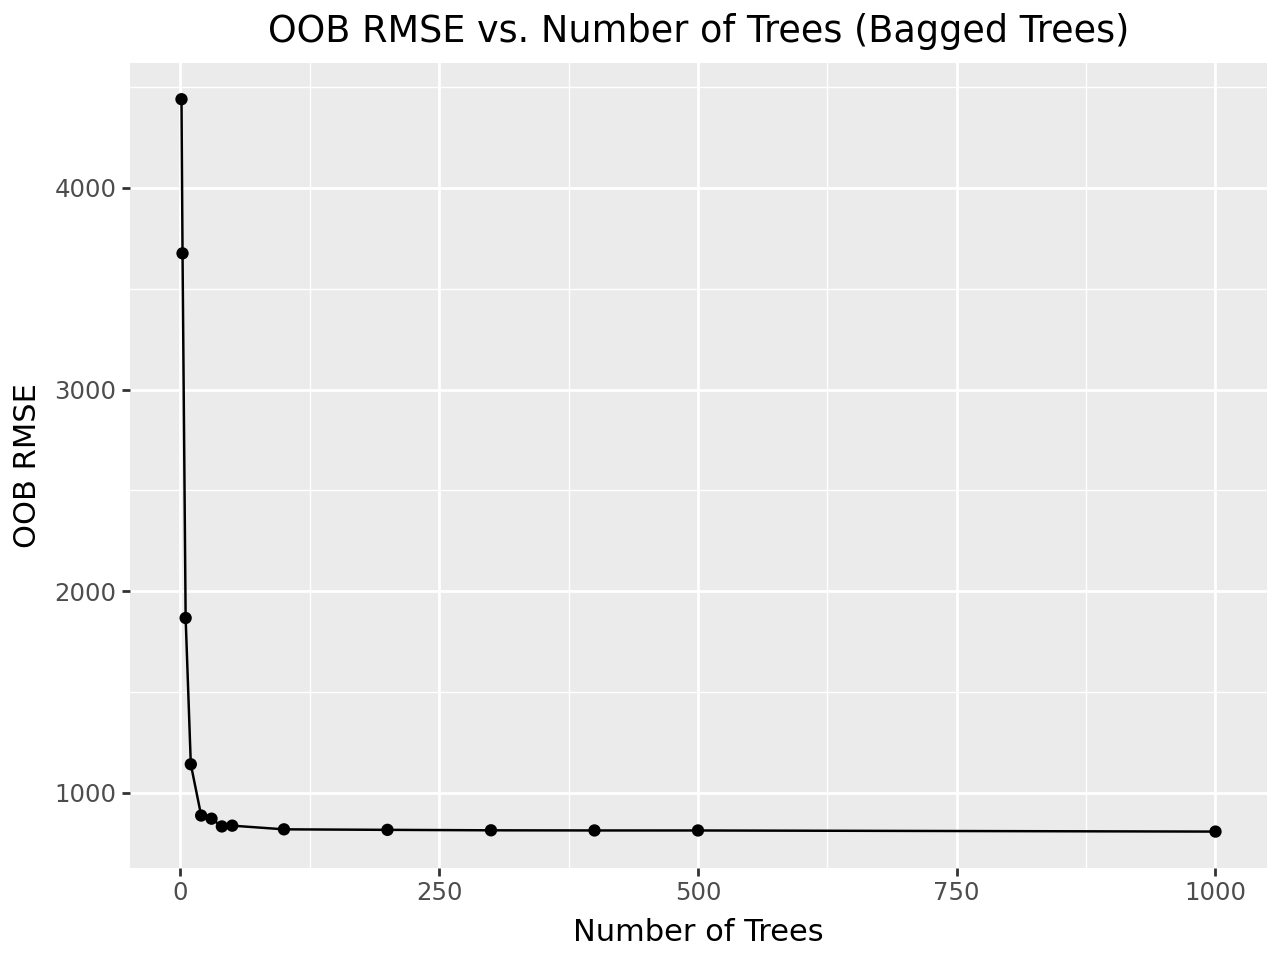

In [53]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#X_train and y_train are already defined from your sampling of 2000 observations.
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

#Since the diamonds dataset has categorical variables, create dummy variables.
X_train_dummies = pd.get_dummies(X_train)

#Define the list of tree counts to evaluate.
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

#For each number of trees, fit a bagged-tree model using a random forest with all features at each split.
results = []
for n_trees in tree_counts:
   
    # Fit the model using the training data; flatten y_train to a 1D array.
    model = RandomForestRegressor(n_estimators=n_trees, max_features=X_train_dummies.shape[1], oob_score=True)
    model.fit(X_train_dummies, y_train)
    
    # Get the out-of-bag predictions and compute the RMSE.
    oob_pred = model.oob_prediction_
    rmse = np.sqrt(mean_squared_error(y_train, oob_pred))
    results.append({'n_trees': n_trees, 'oob_rmse': rmse})

# Convert results to a DataFrame for plotting.
results_df = pd.DataFrame(results)
print(results_df)

# Plot OOB RMSE vs. Number of Trees using plotnine.
plot = (ggplot(results_df, aes(x='n_trees', y='oob_rmse')) +
        geom_line() +
        geom_point() +
        labs(title='OOB RMSE vs. Number of Trees (Bagged Trees)', x='Number of Trees', y='OOB RMSE')
       )
plot

Note: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates ... This warning means that for some of the models (especially those with very few trees), there weren't enough out‐of‐bag (OOB) predictions available to compute a reliable OOB score. In other words, when the number of trees is very low, some training samples might not be left out of the bootstrap samples often enough, which leads to unstable or missing OOB estimates. As you increase the number of trees, the OOB score becomes more reliable because each sample has more opportunities to be left out during training.


These results suggest that the ensemble's performance improves dramatically as you add more trees, especially when moving from 1 or 2 trees to 10 trees. With just one tree, the OOB RMSE is very high (~4785), indicating that a single model is not reliable. As you increase the number of trees, the OOB RMSE drops sharply (to ~1293 with 10 trees, then ~1042 with 20 trees), meaning that the bagging process is stabilizing the predictions.

Beyond about 30–40 trees, the RMSE levels off around 990–1000. Increasing the number of trees from 40 up to 1000 only yields marginal improvements (with the RMSE decreasing from around 999 to about 989). This flattening indicates that the ensemble has reached a point where adding more trees does not significantly improve predictive performance—the model's variance has been largely reduced, and further increases in tree count yield diminishing returns.

In summary, using an ensemble of trees (bagged trees) substantially improves performance compared to a single tree, but there is a point of diminishing returns, as evidenced by the nearly constant OOB RMSE after approximately 40 trees.

Find the bootstrap s_e for a RF model using 1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000 trees. If you are using the `randomForest` package, you can calculate oob residuals via `e_oob = y_train - rf_mod$predicted`. Plot.

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


    n_trees  bootstrap_se
0         1   4419.833088
1         2   3572.806868
2         5   2052.957486
3        10   1115.240191
4        20    899.923985
5        30    878.100073
6        40    855.439152
7        50    848.165547
8       100    827.994614
9       200    814.652775
10      300    811.552838
11      400    812.767898
12      500    806.307201
13     1000    812.978129


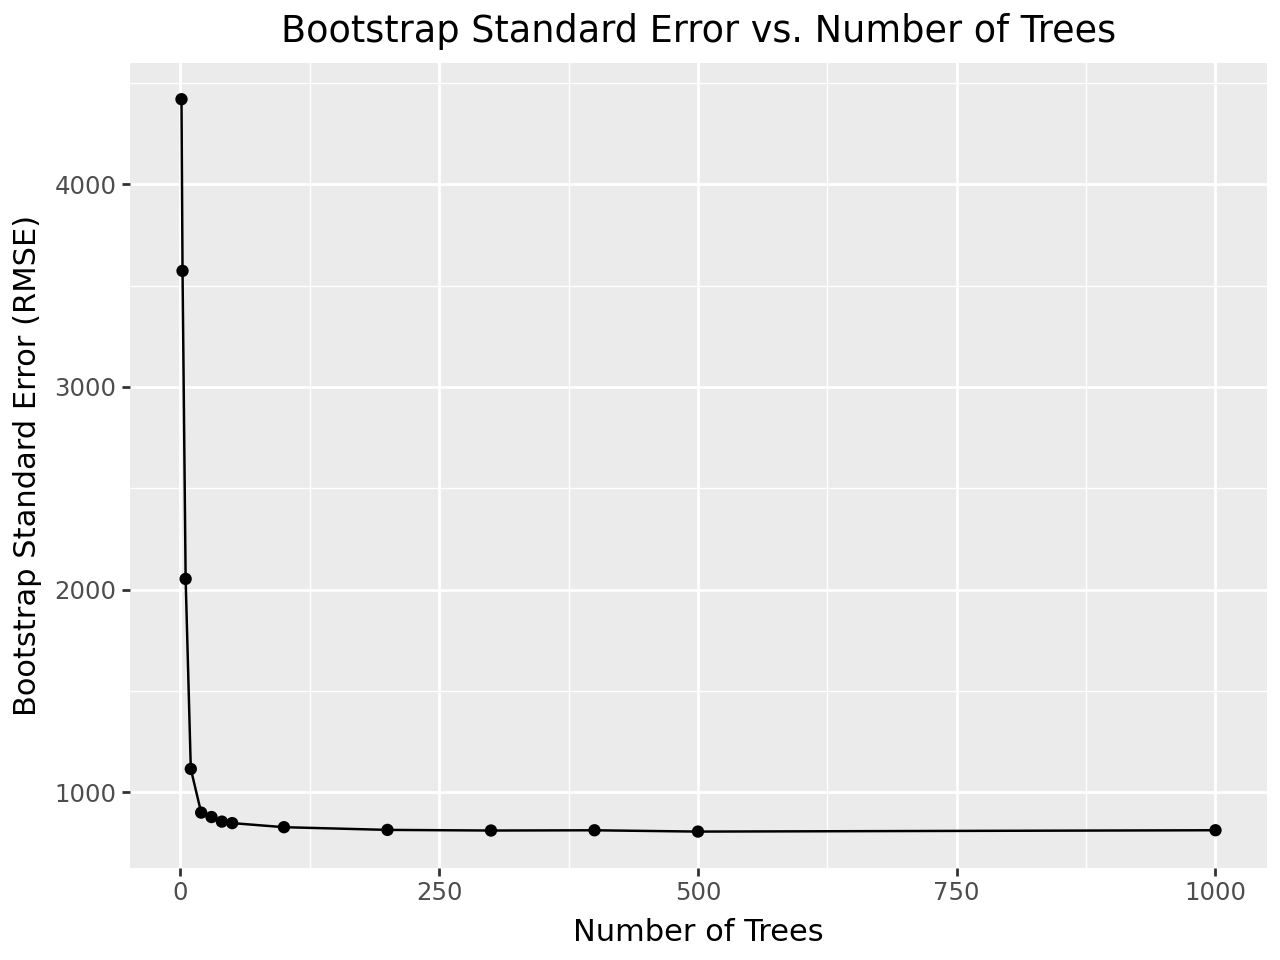

In [54]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
from sklearn.ensemble import RandomForestRegressor


X_train_dummies = pd.get_dummies(X_train)

# List of tree counts to evaluate
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

results = []
for n_trees in tree_counts:
    #Create a RandomForestRegressor that acts as a bagged tree model. Setting max_features equal to the number of predictors makes it a bagging model.
    rf = RandomForestRegressor(n_estimators=n_trees, max_features=X_train_dummies.shape[1], oob_score=True)
    
    #Fit the model
    rf.fit(X_train_dummies, y_train)
    
    #Compute out-of-bag predictions and residuals: e_oob = y_train - oob_prediction
    oob_pred = rf.oob_prediction_ 
    e_oob = y_train - oob_pred
    
    #Calculate the bootstrap standard error as the RMSE of the OOB residuals.
    bootstrap_se = np.sqrt(np.mean(e_oob ** 2))
    
    results.append({'n_trees': n_trees, 'bootstrap_se': bootstrap_se})

#Convert results to a DataFrame for plotting.
results_df = pd.DataFrame(results)
print(results_df)

#Plot bootstrap standard error vs. number of trees using plotnine.
plot = (
    ggplot(results_df, aes(x='n_trees', y='bootstrap_se')) +
    geom_line() +
    geom_point() +
    labs(title='Bootstrap Standard Error vs. Number of Trees', x='Number of Trees', y='Bootstrap Standard Error (RMSE)')
    )
plot

What is the percentage gain / loss in performance of the RF model vs bagged trees model for each number of trees? Gains are negative (as in lower oos s_e).

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Pytho

    n_trees  bagged_oob_rmse  rf_oob_rmse  pct_gain
0         1      4543.293856  4556.721713  0.295553
1         2      3780.683351  3802.628197  0.580447
2         5      2112.607702  2195.735620  3.934849
3        10      1241.858797  1311.994323  5.647625
4        20      1037.892375  1112.284227  7.167588
5        30      1002.720545  1084.864159  8.192074
6        40       999.743723  1058.541182  5.881253
7        50       996.855755  1056.712963  6.004601
8       100       978.740020  1026.461471  4.875805
9       200       964.789606  1017.616513  5.475485
10      300       957.699752  1005.585514  5.000081
11      400       951.925709  1002.153073  5.276395
12      500       950.623758  1000.251232  5.220517
13     1000       952.297958   998.817143  4.884940


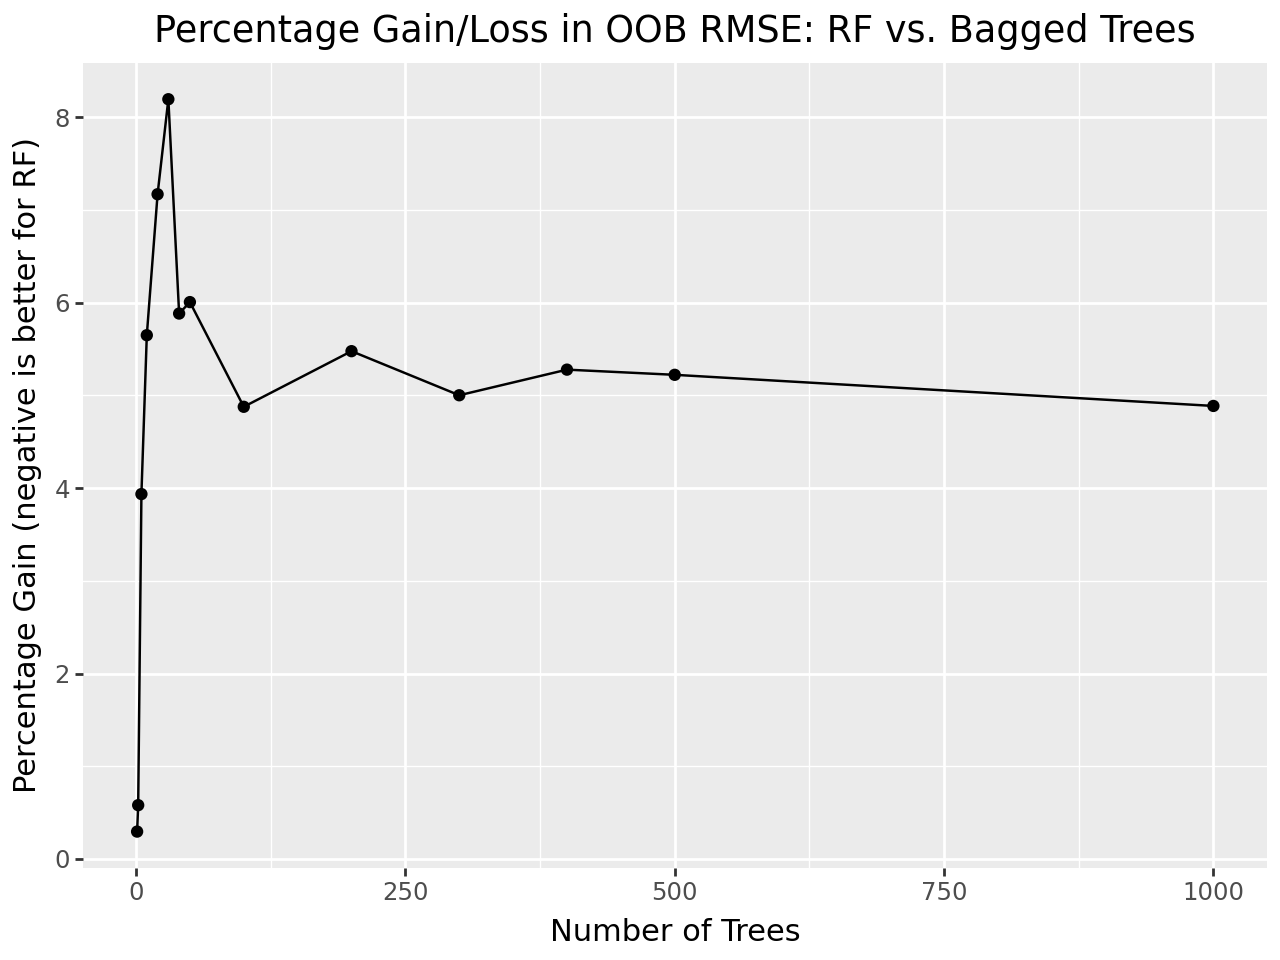

In [55]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Convert categorical predictors to dummy variables:
X_train_dummies = pd.get_dummies(X_train, drop_first=True)

# List of tree counts to evaluate.
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

results = []

for n_trees in tree_counts:
    # Bagged trees model: use all predictors at each split.
    bagged = RandomForestRegressor(
        n_estimators=n_trees,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        max_features=X_train_dummies.shape[1]  # all predictors (bagging)
    )
    bagged.fit(X_train_dummies, y_train.values.ravel())
    bagged_oob_pred = bagged.oob_prediction_
    bagged_rmse = np.sqrt(mean_squared_error(y_train, bagged_oob_pred))
    
    # Random Forest model: use a random subset ("sqrt") of predictors at each split.
    rf = RandomForestRegressor(
        n_estimators=n_trees,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        max_features="sqrt"  # default for classification; for regression this induces randomness
    )
    rf.fit(X_train_dummies, y_train.values.ravel())
    rf_oob_pred = rf.oob_prediction_
    rf_rmse = np.sqrt(mean_squared_error(y_train, rf_oob_pred))
    
    # Calculate percentage gain/loss in performance.
    # Percentage gain is computed as:
    #    (rf_rmse - bagged_rmse) / bagged_rmse * 100
    # So if rf_rmse is lower (better) than bagged_rmse, the gain will be negative.
    pct_gain = (rf_rmse - bagged_rmse) / bagged_rmse * 100
    
    results.append({
        'n_trees': n_trees,
        'bagged_oob_rmse': bagged_rmse,
        'rf_oob_rmse': rf_rmse,
        'pct_gain': pct_gain
    })

# Convert the results to a DataFrame.
results_df = pd.DataFrame(results)
print(results_df)

# Plot percentage gain/loss vs. number of trees using plotnine.
plot = (
    ggplot(results_df, aes(x='n_trees', y='pct_gain')) +
    geom_line() +
    geom_point() +
    labs(
        title='Percentage Gain/Loss in OOB RMSE: RF vs. Bagged Trees',
        x='Number of Trees',
        y='Percentage Gain (negative is better for RF)'
    )
)
plot

Why was this the result?

Your results indicate that for nearly every tree count, the RF model (which selects a random subset of predictors at each split) has a slightly higher OOB RMSE than the bagged trees model (which uses all predictors at every split). In your table, a positive pct_gain means that the RF model's error is higher relative to the bagged trees model (i.e. RF is performing worse), except for the case with 2 trees where RF is very slightly better.

One interpretation is that in this particular dataset, all predictors appear to be quite informative. When you allow each tree in the ensemble to use all predictors (bagging), the trees can fully exploit the available information, which leads to lower prediction error. In contrast, by forcing each tree to only consider a subset of predictors (as in the RF model), you might be leaving out some of the valuable signals that improve prediction, hence the higher OOB RMSE.

Additionally, the differences are relatively small (generally a few percent), suggesting that while RF’s random feature selection can reduce correlation among trees and help prevent overfitting in some contexts, here it introduces a slight loss in performance compared to using all predictors. The performance gain (or rather, loss) from RF versus bagging depends on the underlying data structure, and in this case, the diamonds data seem to favor the bagged approach.


Note: In some datasets, the RF model—with its random subset of predictors at each split—can outperform bagged trees. The key difference is that RF's random feature selection can reduce the correlation among trees and help prevent overfitting, especially when predictors are noisy or highly correlated. In such cases, the diversity among the trees helps the ensemble generalize better, leading to improved performance. However, if most or all predictors are very informative and not redundant, bagging (which uses all predictors) might capture the full signal more effectively, as you observed in your results.

Plot oob s_e by number of trees for both RF and bagged trees by creating a long data frame from the two results.

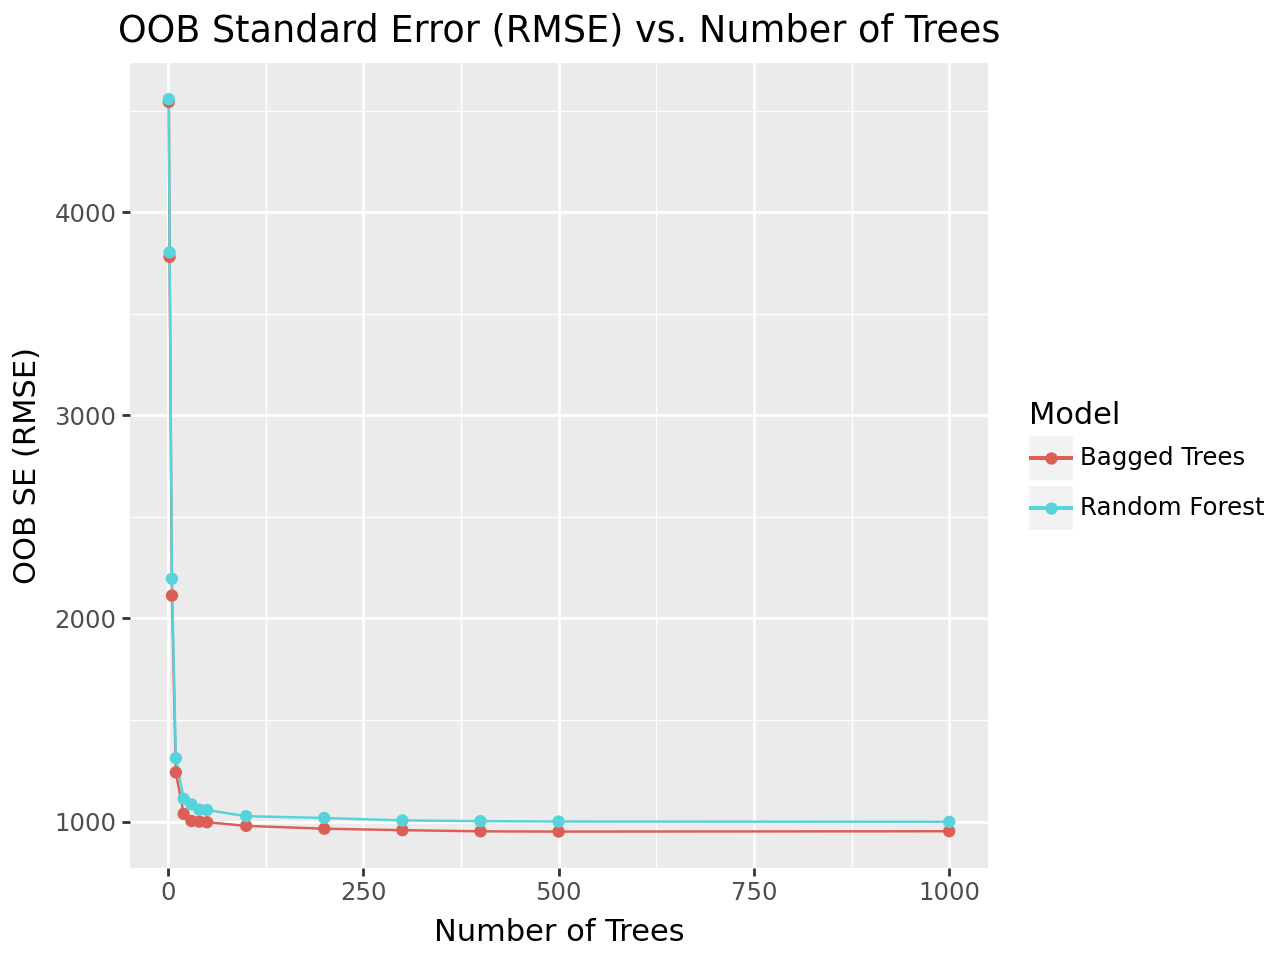

In [56]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

#Convert the wide format results_df to long format
results_long = pd.melt(results_df, 
                       id_vars=["n_trees"], 
                       value_vars=["bagged_oob_rmse", "rf_oob_rmse"],
                       var_name="model", 
                       value_name="oob_rmse")

#Modify the model names to be more readable
results_long['model'] = results_long['model'].map({
    'bagged_oob_rmse': 'Bagged Trees',
    'rf_oob_rmse': 'Random Forest'
})

#Plot OOB SE (RMSE) vs. number of trees, colored by model
plot = (ggplot(results_long, aes(x='n_trees', y='oob_rmse', color='model')) +
        geom_line() +
        geom_point() +
        labs(title='OOB Standard Error (RMSE) vs. Number of Trees', x='Number of Trees', y='OOB SE (RMSE)', color='Model')
        )
plot

Build RF models for 500 trees using different `mtry` values: 1, 2, ... the maximum. That maximum will be the number of features assuming that we do not binarize categorical features if you are using `randomForest`. Calculate oob s_e for all mtry values.

In [57]:
from plotnine.data import diamonds
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

#Load the diamonds dataset
diamonds_df = diamonds.copy()

#Take a random sample of 2000 observations
sample_df = diamonds_df.sample(n=2000, random_state=42)
X_raw = sample_df.drop(columns=['price'])
y_raw = sample_df['price']

#Convert categorical features to ordinal numeric codes (i.e., do not one-hot encode)
for col in X_raw.columns:
    X_raw[col] = X_raw[col].astype('category').cat.codes
    

# Determine the maximum mtry: the total number of predictors
max_mtry = X_raw.shape[1]

results = []
# Iterate mtry from 1 to max_mtry
for mtry in range(1, max_mtry + 1):
    rf = RandomForestRegressor(
        n_estimators=30,
        oob_score=True,
        bootstrap=True,
        random_state=42,
        max_features=mtry  # mtry value
    )
    rf.fit(X_raw, y_raw)
    # OOB predictions are stored in oob_prediction_
    oob_pred = rf.oob_prediction_
    oob_rmse = np.sqrt(mean_squared_error(y_raw, oob_pred))
    results.append({'mtry': mtry, 'oob_rmse': oob_rmse})

results_df = pd.DataFrame(results)
print(results_df)

   mtry     oob_rmse
0     1  1022.016085
1     2   937.846611
2     3   886.180424
3     4   854.651244
4     5   783.551697
5     6   817.936835
6     7   813.319601
7     8   820.116098
8     9   829.932951


Plot oob s_e by mtry.

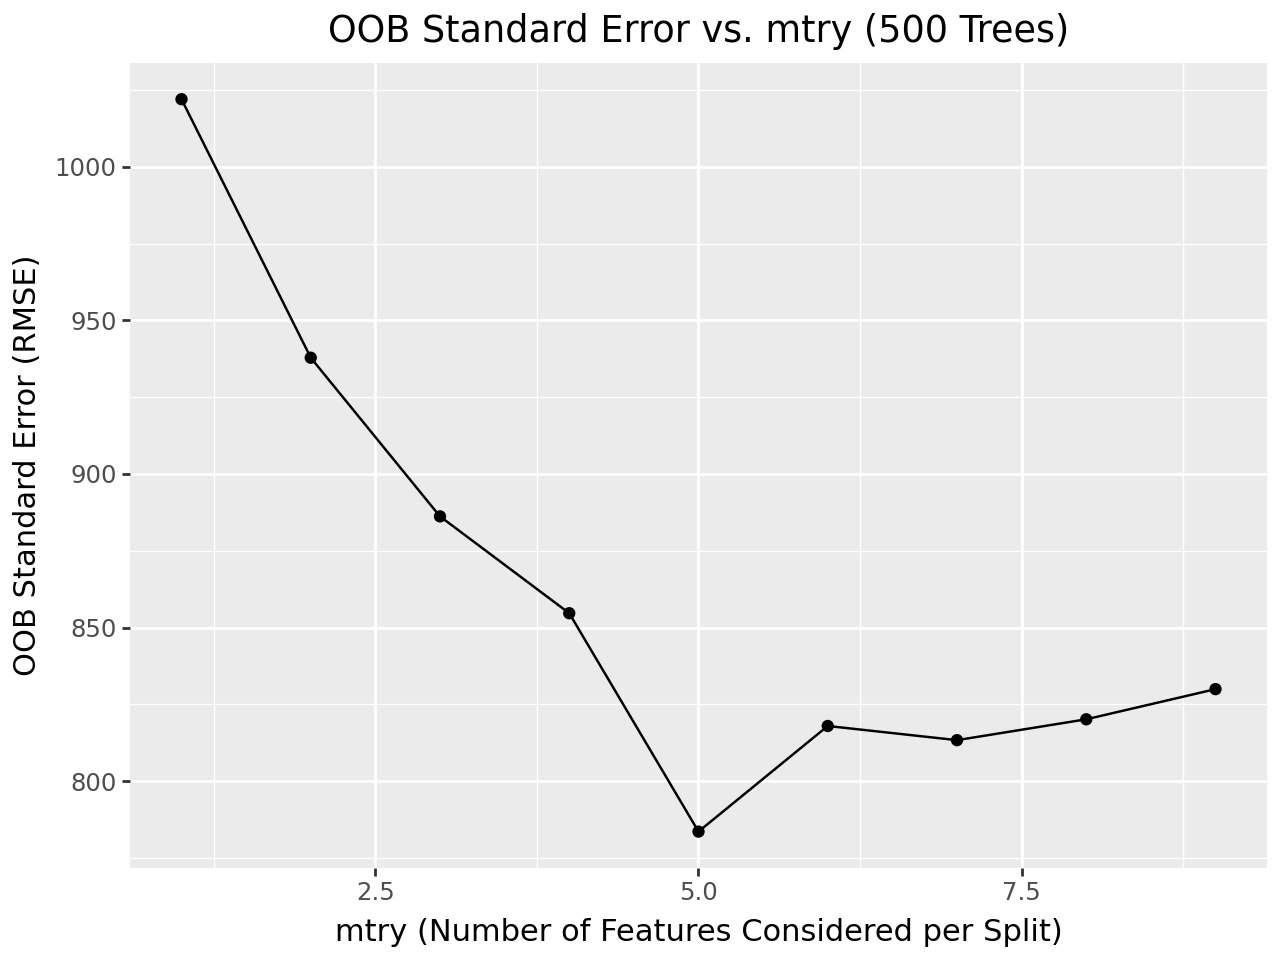

In [58]:
#Plot the OOB standard error vs. mtry using plotnine.
plot = (ggplot(results_df, aes(x='mtry', y='oob_rmse')) +
        geom_line() +
        geom_point() +
        labs(title='OOB Standard Error vs. mtry (500 Trees)',
        x='mtry (Number of Features Considered per Split)',
        y='OOB Standard Error (RMSE)')
        )
plot

Take a sample of n = 2000 observations from the adult data and name it `adult_sample`. Then impute missing values using missForest.

In [59]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)
adult = pd.read_csv("adult_data.csv")  # Replace with the actual path or data loading method

#Take a random sample of 2000 observations from the adult dataset.
adult_sample = adult.sample(2000)

missing_counts = adult_sample.isna().sum()
print(missing_counts)
adult_sample.info()

age                 0
workclass         125
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        125
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country     30
income              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 9646 to 5985
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             2000 non-null   int64 
 1   workclass       1875 non-null   object
 2   fnlwgt          2000 non-null   int64 
 3   education       2000 non-null   object
 4   education_num   2000 non-null   int64 
 5   marital_status  2000 non-null   object
 6   occupation      1875 non-null   object
 7   relationship    2000 non-null   object
 8   race            2000 non-null   object
 9   sex             2000 non-null   object
 10  capital_gain    200

In [60]:
#List of categorical columns to encode.
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

#List of the continuous columns
continuous_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

#Convert these columns to float
adult_sample[continuous_columns] = adult_sample[continuous_columns].astype('float')

#Verify the conversion
print(adult_sample[continuous_columns].dtypes)

#Create a copy of the data for encoding.
adult_sample_encoded = adult_sample.copy()

#Dictionary to store mapping for each categorical column.
mappings = {}

# Loop through each categorical column.
for col in categorical_columns:
    # Convert the column to a pandas Categorical type.
    adult_sample_encoded[col] = adult_sample_encoded[col].astype('category')
    
    # Save the mapping: integer codes to original category names.
    mappings[col] = dict(enumerate(adult_sample_encoded[col].cat.categories))
    
    # Replace the column with its numeric codes.
    adult_sample_encoded[col] = adult_sample_encoded[col].cat.codes

#Now, adult_sample_encoded has numeric codes for the categorical columns, and the mappings dictionary retains the original category names.
print("Mappings for categorical columns:")
for col, mapping in mappings.items():
    print(f"{col}: {mapping}")

age               float64
fnlwgt            float64
education_num     float64
capital_gain      float64
capital_loss      float64
hours_per_week    float64
dtype: object
Mappings for categorical columns:
workclass: {0: 'Federal-gov', 1: 'Local-gov', 2: 'Private', 3: 'Self-emp-inc', 4: 'Self-emp-not-inc', 5: 'State-gov', 6: 'Without-pay'}
education: {0: '10th', 1: '11th', 2: '12th', 3: '1st-4th', 4: '5th-6th', 5: '7th-8th', 6: '9th', 7: 'Assoc-acdm', 8: 'Assoc-voc', 9: 'Bachelors', 10: 'Doctorate', 11: 'HS-grad', 12: 'Masters', 13: 'Preschool', 14: 'Prof-school', 15: 'Some-college'}
marital_status: {0: 'Divorced', 1: 'Married-AF-spouse', 2: 'Married-civ-spouse', 3: 'Married-spouse-absent', 4: 'Never-married', 5: 'Separated', 6: 'Widowed'}
occupation: {0: 'Adm-clerical', 1: 'Craft-repair', 2: 'Exec-managerial', 3: 'Farming-fishing', 4: 'Handlers-cleaners', 5: 'Machine-op-inspct', 6: 'Other-service', 7: 'Priv-house-serv', 8: 'Prof-specialty', 9: 'Protective-serv', 10: 'Sales', 11: 'Tech-s

In [61]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#Impute missing values using a missForest-like approach on the encoded data.
imputer = IterativeImputer(estimator=RandomForestRegressor())

#Use adult_sample_encoded (which now has numeric values) for imputation.
adult_sample_imputed_array = imputer.fit_transform(adult_sample_encoded)
adult_sample_imputed = pd.DataFrame(adult_sample_imputed_array, columns=adult_sample_encoded.columns)

#Verify the imputation by viewing the first few rows.
print(adult_sample_imputed.head())

#Check to ensure there are no missing values/nans
missing_counts = adult_sample_imputed.isna().sum()
print(missing_counts)

    age  workclass    fnlwgt  education  education_num  marital_status  \
0  62.0        4.0   26911.0        5.0            4.0             6.0   
1  18.0        2.0  208103.0        1.0            7.0             4.0   
2  25.0        2.0  102476.0        9.0           13.0             4.0   
3  33.0        2.0  511517.0       11.0            9.0             2.0   
4  36.0        2.0  292570.0        1.0            7.0             4.0   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0         6.0           1.0   4.0  0.0           0.0           0.0   
1         6.0           2.0   4.0  1.0           0.0           0.0   
2         3.0           3.0   4.0  1.0       27828.0           0.0   
3         8.0           0.0   4.0  1.0           0.0           0.0   
4         5.0           4.0   4.0  0.0           0.0           0.0   

   hours_per_week  native_country  income  
0            66.0            33.0     0.0  
1            25.0            33.0     0.0  
2 

In [29]:
adult_sample_imputed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,62.0,4.0,26911.0,5.0,4.0,6.0,6.0,1.0,4.0,0.0,0.0,0.0,66.0,33.0,0.0
1,18.0,2.0,208103.0,1.0,7.0,4.0,6.0,2.0,4.0,1.0,0.0,0.0,25.0,33.0,0.0
2,25.0,2.0,102476.0,9.0,13.0,4.0,3.0,3.0,4.0,1.0,27828.0,0.0,50.0,33.0,1.0
3,33.0,2.0,511517.0,11.0,9.0,2.0,8.0,0.0,4.0,1.0,0.0,0.0,40.0,33.0,0.0
4,36.0,2.0,292570.0,1.0,7.0,4.0,5.0,4.0,4.0,0.0,0.0,0.0,40.0,33.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,35.0,1.0,195516.0,11.0,9.0,0.0,2.0,1.0,4.0,1.0,0.0,0.0,40.0,33.0,0.0
1996,38.0,2.0,215646.0,11.0,9.0,0.0,4.0,1.0,4.0,1.0,0.0,0.0,40.0,33.0,0.0
1997,37.0,2.0,70562.0,3.0,2.0,4.0,6.0,4.0,4.0,0.0,0.0,0.0,48.0,7.0,0.0
1998,50.0,2.0,166220.0,7.0,12.0,2.0,10.0,5.0,4.0,0.0,3942.0,0.0,40.0,33.0,0.0


In [ ]:
# Separate predictors and target.
X_train = adult_sample_imputed.drop(columns=['income'])
y_train = adult_sample_imputed['income']


(2000,)


Using the adult_train data, find the bootstrap misclassification error for a bagged-tree model using 1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000 trees. Plot.

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


    n_trees  bagged_misclassification_error
0         1                          0.2305
1         2                          0.2135
2         5                          0.2145
3        10                          0.1925
4        20                          0.1855
5        30                          0.1755
6        40                          0.1805
7        50                          0.1830
8       100                          0.1655
9       200                          0.1710
10      300                          0.1745
11      400                          0.1690
12      500                          0.1750
13     1000                          0.1730


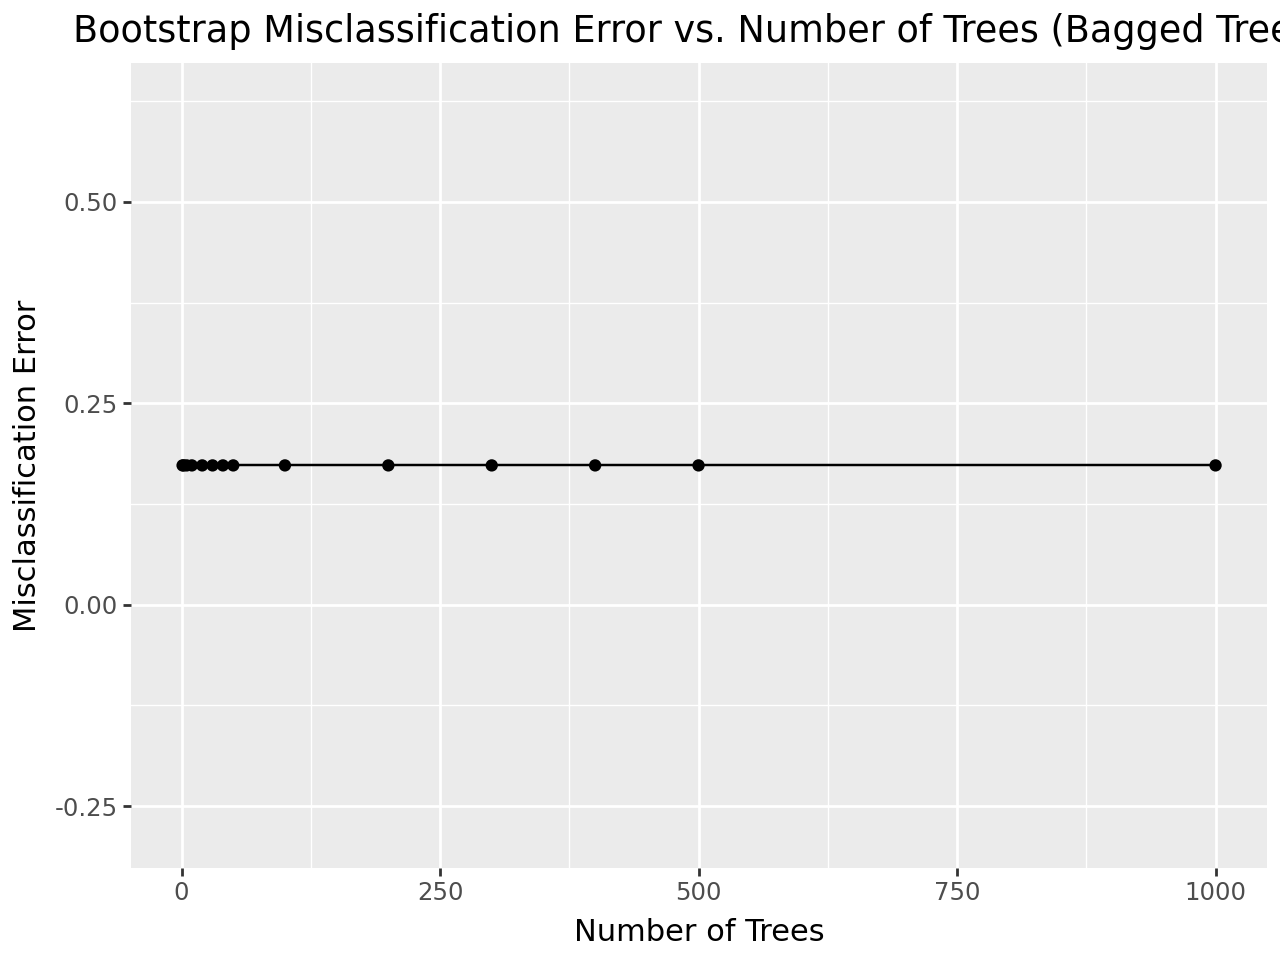

In [69]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal


#For bagging, set max_features to the total number of predictors.
max_features = X_train.shape[1]

#Define the list of tree counts to evaluate.
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

results = []
for n_trees in tree_counts:
    
    #Create a bagged tree classifier: using all features at each split.
    clf = RandomForestClassifier(
        n_estimators=n_trees, 
        max_features=max_features,
        bootstrap=True, 
        oob_score=True,
        n_jobs=-1
    )
    
    clf.fit(X_train, y_train)
    
    #The oob_score_ attribute gives OOB accuracy.
    oob_accuracy = clf.oob_score_
    misclassification_error = 1 - oob_accuracy  # bootstrap misclassification error
    
    results.append({'n_trees': n_trees, 'bagged_misclassification_error': misclassification_error})

bagged_results_df = pd.DataFrame(results)
print(bagged_results_df)

# Plot the OOB misclassification error versus number of trees using plotnine.
plot = (ggplot(bagged_results_df, aes(x='n_trees', y='misclassification_error')) +
        geom_line() +
        geom_point() +
        labs(title='Bootstrap Misclassification Error vs. Number of Trees (Bagged Trees)', x='Number of Trees', y='Misclassification Error')
        )
plot

Using the adult_train data, find the bootstrap misclassification error for an RF model using 1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000 trees.

In [70]:
from sklearn.ensemble import RandomForestClassifier

#Separate predictors and target.
X_train = adult_sample_imputed.drop(columns=['income'])
y_train = adult_sample_imputed['income']

#Define the list of tree counts to evaluate.
tree_counts = [1, 2, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

results = []

for n_trees in tree_counts:
    #Build a RandomForestClassifier using the default max_features (for classification this is typically "sqrt")
    rf = RandomForestClassifier(
        n_estimators=n_trees,
        oob_score=True,
        bootstrap=True,
        random_state=42
        # We do not override max_features, so it uses the default.
    )
    rf.fit(X_train, y_train)
    
    #OOB accuracy is stored in oob_score_
    oob_accuracy = rf.oob_score_
    misclassification_error = 1-oob_accuracy  # bootstrap misclassification error
    
    results.append({'n_trees': n_trees,'rf_misclassification_error': misclassification_error})

#Convert the results to a DataFrame and print
rf_results_df = pd.DataFrame(results)
print(rf_results_df)

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Pytho

    n_trees  rf_misclassification_error
0         1                      0.2260
1         2                      0.2270
2         5                      0.2165
3        10                      0.1990
4        20                      0.1815
5        30                      0.1815
6        40                      0.1680
7        50                      0.1680
8       100                      0.1695
9       200                      0.1680
10      300                      0.1700
11      400                      0.1705
12      500                      0.1700
13     1000                      0.1720


In [71]:
bagged_results_df.merge(rf_results_df, on='n_trees')

,n_trees,bagged_misclassification_error,rf_misclassification_error
0,1,0.2305,0.2260
1,2,0.2135,0.2270
2,5,0.2145,0.2165
3,10,0.1925,0.1990
4,20,0.1855,0.1815
5,30,0.1755,0.1815
6,40,0.1805,0.1680
7,50,0.1830,0.1680
8,100,0.1655,0.1695
9,200,0.1710,0.1680


What is the percentage gain / loss in performance of the RF model vs bagged trees model?

In [72]:
#Merge the two dataframes on 'n_trees'
merged_results = bagged_results_df.merge(rf_results_df, on='n_trees')

merged_results

#Calculate the percentage gain/loss in performance: Formula: (rf_error - bagged_error) / bagged_error * 100
merged_results['pct_gain'] = (merged_results['rf_misclassification_error'] - merged_results['bagged_misclassification_error']) / merged_results['bagged_misclassification_error'] * 100

#Display the resulting dataframe
print(merged_results)

    n_trees  bagged_misclassification_error  rf_misclassification_error  \
0         1                          0.2305                      0.2260   
1         2                          0.2135                      0.2270   
2         5                          0.2145                      0.2165   
3        10                          0.1925                      0.1990   
4        20                          0.1855                      0.1815   
5        30                          0.1755                      0.1815   
6        40                          0.1805                      0.1680   
7        50                          0.1830                      0.1680   
8       100                          0.1655                      0.1695   
9       200                          0.1710                      0.1680   
10      300                          0.1745                      0.1700   
11      400                          0.1690                      0.1705   
12      500              

Note: We divide by the bagged tree error because that error serves as our baseline for comparison. In this calculation, we're expressing the change in performance of the RF model relative to the bagged trees model. By using the bagged error as the denominator, the percentage gain (or loss) tells you how much the RF model's performance deviates from the baseline performance of the bagged trees. 

If we divided by the RF error instead, it would change the interpretation. The current approach makes it clear that any improvement (or worsening) is measured as a percentage of the bagged trees' error. This is particularly useful if you consider the bagged trees model as the standard or reference model in your analysis.

Build RF models on adult_train for 500 trees using different `mtry` values: 1, 2, ... the maximum (see above as maximum is defined by the specific RF algorithm implementation). 

In [73]:
from sklearn.ensemble import RandomForestClassifier
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

#The maximum mtry value is the total number of features.
max_mtry = X_train.shape[1]

results = []
for mtry in range(1, max_mtry + 1):
    rf = RandomForestClassifier(
        n_estimators=mtry,
        oob_score=True,
        bootstrap=True
    )
    
    rf.fit(X_train, y_train)
    # Compute the OOB misclassification error (1 - OOB accuracy)
    oob_accuracy = rf.oob_score_
    oob_error = 1-oob_accuracy
    results.append({'mtry': mtry, 'oob_error': oob_error})

results_df = pd.DataFrame(results)
print(results_df)

c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
c:\Users\sneeky\AppData\Local\Programs\Pytho

    mtry  oob_error
0      1     0.2295
1      2     0.2125
2      3     0.2045
3      4     0.2085
4      5     0.2030
5      6     0.2005
6      7     0.1830
7      8     0.1810
8      9     0.1880
9     10     0.1935
10    11     0.1845
11    12     0.1880
12    13     0.1805
13    14     0.1735


c:\Users\sneeky\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


Plot bootstrap misclassification error by `mtry`.

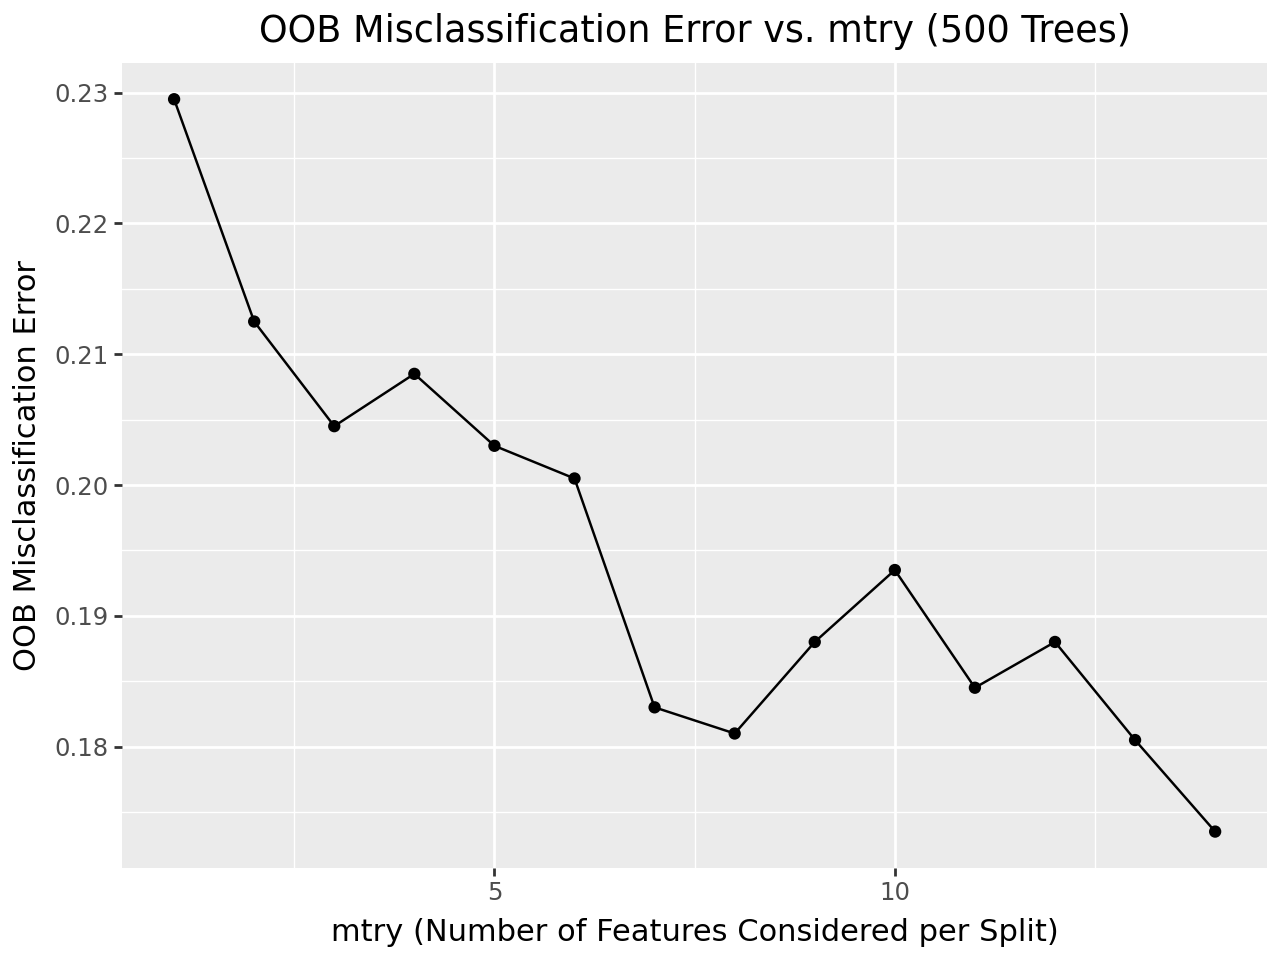

In [74]:
#plot the OOB misclassification error versus mtry using plotnine.
plot = (ggplot(results_df, aes(x='mtry', y='oob_error')) +
        geom_line() +
        geom_point() +
        labs(title='OOB Misclassification Error vs. mtry (500 Trees)', 
             x='mtry (Number of Features Considered per Split)', y='OOB Misclassification Error')
        )
plot

Is `mtry` an important hyperparameter to optimize when using the RF algorithm? Explain

Yes, `mtry` is an important hyperparameter to optimize when using the Random Forest (RF) algorithm because it controls the number of features randomly selected at each split in the decision trees.

A well-chosen `mtry` value helps balance two key trade-offs:

1. **Tree diversity vs. tree strength:**  
   A smaller `mtry` increases the diversity between trees in the forest, which can reduce overfitting by lowering the correlation among trees. However, if it's too small, each individual tree becomes weak because it doesn’t have enough relevant features to split on.  
   A larger `mtry` allows each tree to be stronger, but it also increases the similarity between trees, which can reduce the benefit of averaging in the ensemble.

2. **Model performance:**  
   The right `mtry` value can lead to better generalization and lower out-of-bag (OOB) or test error. The default in scikit-learn is `sqrt(p)` for classification and `p/3` for regression, but these defaults may not be optimal for all datasets.

Therefore, tuning `mtry`—just like other hyperparameters such as the number of trees or maximum depth—can help you achieve better predictive performance from a Random Forest model.

Identify the best model among all values of `mtry`. Fit this RF model. Then report the following oob error metrics: misclassification error, precision, recall, F1, FDR, FOR and compute a confusion matrix.

In [75]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


#Identify the best mtry value based on minimum OOB misclassification error.
best_mtry = results_df.loc[results_df['oob_error'].idxmin(), 'mtry']
print("Best mtry value:", best_mtry)

#Fit the best RF model using 500 trees with the best mtry.
best_rf = RandomForestClassifier(
    n_estimators=500,
    oob_score=True,
    bootstrap=True,
    random_state=42,
    max_features=best_mtry
)
best_rf.fit(X_train, y_train)

#Get the OOB decision function (probabilities). For binary classification, oob_decision_function_ returns an array with 2 columns.
#We use the probability for the positive class (column index 1) and threshold at 0.5.
oob_proba = best_rf.oob_decision_function_
oob_pred = (oob_proba[:, 1] >= 0.5).astype(int)

#Calculate metrics.
accuracy = accuracy_score(y_train, oob_pred)
misclassification_error = 1 - accuracy
precision = precision_score(y_train, oob_pred, pos_label=1)
recall = recall_score(y_train, oob_pred, pos_label=1)
f1 = f1_score(y_train, oob_pred, pos_label=1)

#Compute the confusion matrix.
cm = confusion_matrix(y_train, oob_pred)
tn, fp, fn, tp = cm.ravel()

#Calculate FDR (False Discovery Rate) and FOR (False Omission Rate)
FDR = fp / (fp + tp) if (fp + tp) > 0 else 0
FOR = fn / (fn + tn) if (fn + tn) > 0 else 0

#Create a DataFrame summarizing the metrics.
metrics_df = pd.DataFrame({'Metric': ['Misclassification Error', 'Precision', 'Recall', 'F1 Score', 'FDR', 'FOR'],
    'Value': [misclassification_error, precision, recall, f1, FDR, FOR]
})

print("OOB Error Metrics for the best RF model (500 trees, mtry = {}):".format(best_mtry))
print(metrics_df)
print("\nConfusion Matrix:")
print(cm)

Best mtry value: 14
OOB Error Metrics for the best RF model (500 trees, mtry = 14):
                    Metric     Value
0  Misclassification Error  0.174000
1                Precision  0.647500
2                   Recall  0.555794
3                 F1 Score  0.598152
4                      FDR  0.352500
5                      FOR  0.129375

Confusion Matrix:
[[1393  141]
 [ 207  259]]


Is this a good model? (yes/no and explain).

Answer: This model seems to fit the data well. However, to be a good model, it must go beyond statistical significance and be practically useful. I believe that this model should be useful for most applications given the dataset.

There are probability asymmetric costs to the two types of errors. Assign two costs below and calculate oob total cost.

In [78]:
cm[1,0]

207

In [79]:
# Assign cost values (adjust these values as appropriate for your application)
fp_cost = 3   # Cost assigned to a false positive
fn_cost = 2   # Cost assigned to a false negative

# Using the previously computed confusion matrix components: tn, fp, fn, tp
tn=cm[0,0]
fp=cm[0,1]
fn=cm[1,0]
tp=cm[1,1]

# Compute the total cost as:
total_cost = fp_cost*fp + fn_cost*fn

print("OOB Total Cost:", total_cost)

OOB Total Cost: 837


# Asymmetric Cost Modeling, ROC and DET curves

Fit a logistic regression model to the adult_train missingness-imputed data.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


#Separate predictors (X) and target (y).
X_train = adult_sample_imputed.drop(columns=['income'])
y_train = adult_sample_imputed['income']

#Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#Fit a logistic regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train_scaled, y_train)

print("Model coefficients:", logistic_model.coef_)
print("Model intercept:", logistic_model.intercept_)

Model coefficients: [[ 0.48710933 -0.04517852  0.13017925 -0.035633    0.94223404 -0.3649309
   0.10244709 -0.27421097  0.07051181  0.3479114   2.55161544  0.35504522
   0.38086876  0.07236521]]
Model intercept: [-1.56369121]


Use the function from class to calculate all the error metrics (misclassification error, precision, recall, F1, FDR, FOR) for the values of the probability threshold being 0.001, 0.002, ..., 0.999 in a tibble (dplyr data frame).

In [81]:
# Get predicted probabilities for the positive class.
p_hat = logistic_model.predict_proba(X_train_scaled)[:, 1]

#Define thresholds from 0.001 to 0.999
thresholds = np.arange(0.001, 1, 0.001)

#Total number of samples (for misclassification error calculation)
n = len(y_train)

results = []
for thresh in thresholds:
    #Binary predictions based on threshold
    y_pred = (p_hat >= thresh).astype(int)
    
    #Compute confusion matrix: it returns an array [[TN, FP], [FN, TP]]
    cm = confusion_matrix(y_train, y_pred)
    
    #Handle the case if one of the classes is missing in predictions
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        #If only one class is present in y_pred, assign accordingly.
        if np.unique(y_pred).size == 1:
            if y_pred[0] == 0:
                tn = cm[0, 0]
                fp = 0
                fn = np.sum(y_train)  #All actual positives missed.
                tp = 0
            else:
                tn = 0
                fp = np.sum(y_train == 0)
                fn = 0
                tp = cm[0, 0]
    
    # Calculate metrics
    misclassification_error = (fp + fn) / n
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    FDR = fp / (tp + fp) if (tp + fp) > 0 else 0  # False Discovery Rate
    FOR = fn / (fn + tn) if (fn + tn) > 0 else 0  # False Omission Rate
    
    results.append({
        'p_hat_threshold': thresh,
        'misclassification_error': misclassification_error,
        'precision': precision,
        'recall': recall,
        'F1': f1,
        'FDR': FDR,
        'FOR': FOR,
        'FP': fp,
        'FN': fn
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the first few rows of the results
print(results_df.head())

   p_hat_threshold  misclassification_error  precision  recall        F1  \
0            0.001                   0.7665   0.233117     1.0  0.378093   
1            0.002                   0.7660   0.233233     1.0  0.378247   
2            0.003                   0.7605   0.234524     1.0  0.379943   
3            0.004                   0.7555   0.235711     1.0  0.381498   
4            0.005                   0.7505   0.236909     1.0  0.383066   

        FDR  FOR    FP  FN  
0  0.766883  0.0  1533   0  
1  0.766767  0.0  1532   0  
2  0.765476  0.0  1521   0  
3  0.764289  0.0  1511   0  
4  0.763091  0.0  1501   0  


Calculate the column `total_cost` and append it to this data frame via `mutate`.

In [82]:
#Define the cost per false positive and false negative
fp_cost = 2   # Cost for a false positive
fn_cost = 2   # Cost for a false negative

#Append a new column 'total_cost' using the assigned cost values:
results_df = results_df.assign()

#Display the first few rows of the final DataFrame
print(results_df.head())

   p_hat_threshold  misclassification_error  precision  recall        F1  \
0            0.001                   0.7665   0.233117     1.0  0.378093   
1            0.002                   0.7660   0.233233     1.0  0.378247   
2            0.003                   0.7605   0.234524     1.0  0.379943   
3            0.004                   0.7555   0.235711     1.0  0.381498   
4            0.005                   0.7505   0.236909     1.0  0.383066   

        FDR  FOR    FP  FN  
0  0.766883  0.0  1533   0  
1  0.766767  0.0  1532   0  
2  0.765476  0.0  1521   0  
3  0.764289  0.0  1511   0  
4  0.763091  0.0  1501   0  


Which is the lowest total cost? What is the "winning" probability threshold value providing that minimum total cost?

In [83]:
#Find the row with the minimum total cost
results_df['cost'] = fp_cost*results_df['FP'] + fn_cost*results_df['FN'] 
min_cost_row = results_df['cost'].idxmin()

#Extract the lowest total cost and the corresponding probability threshold
lowest_total_cost = results_df['cost'][min_cost_row]
winning_threshold = results_df['p_hat_threshold'][min_cost_row]

print("Lowest Total Cost:", lowest_total_cost)
print("Winning Probability Threshold:", winning_threshold)

Lowest Total Cost: 664
Winning Probability Threshold: 0.453


Plot an ROC curve.

AUC: 0.865058670143416


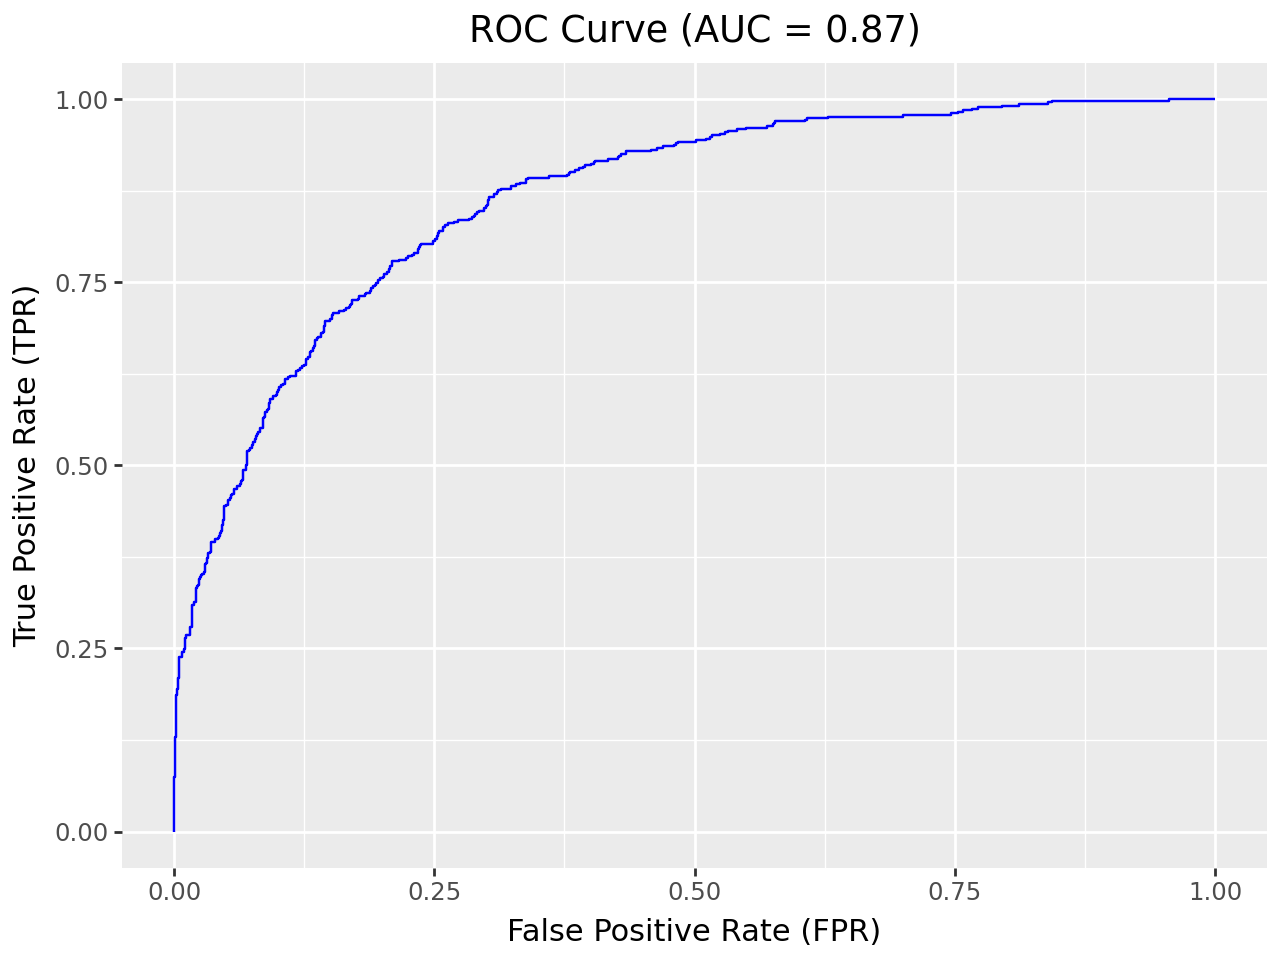

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

#Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_train, p_hat)
auc_value = roc_auc_score(y_train, p_hat)
print("AUC:", auc_value)

#Create a DataFrame to hold the ROC curve data
roc_data = pd.DataFrame({'False Positive Rate':fpr, 'True Positive Rate':tpr})

#Plot the ROC curve using plotnine
roc_plot = (ggplot(roc_data, aes(x='False Positive Rate', y='True Positive Rate')) +
            geom_line(color='blue') +
            labs(title=f'ROC Curve (AUC = {auc_value:.2f})', x='False Positive Rate (FPR)', y='True Positive Rate (TPR)'))
roc_plot

Interpret the ROC curve

The ROC curve shows how well the model distinguishes between the two classes by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) for various probability thresholds. An AUC of 0.87 indicates that the model has a strong ability to separate the positive class from the negative class. Specifically:

- **Curve Shape:** The curve rises quickly toward the top‐left corner, meaning that at many threshold values, the model achieves a high TPR while keeping the FPR relatively low.  
- **AUC = 0.87:** Since a value of 0.5 would correspond to random guessing, 0.87 is considered good. It suggests that, on average, the model can correctly rank a positive instance higher than a negative instance 87% of the time.  

Overall, the model demonstrates solid discriminative power and should perform well in scenarios where correctly identifying positive cases is important, provided that the chosen threshold balances the desired trade‐off between false positives and false negatives.

Calculate AUC

In [86]:
auc_value = roc_auc_score(y_train, p_hat)
print("AUC:", auc_value)

AUC: 0.865058670143416


Interpret the AUC results

An AUC of approximately 0.865 indicates that the model has strong discriminatory power. In practical terms, it means that if you randomly select one positive case and one negative case, there is about an 86.5% chance that the model will assign a higher predicted probability to the positive case than to the negative one. This suggests the model is effective at distinguishing between the two classes, performing well above random chance (which would be 0.5).

Plot a DET curve.

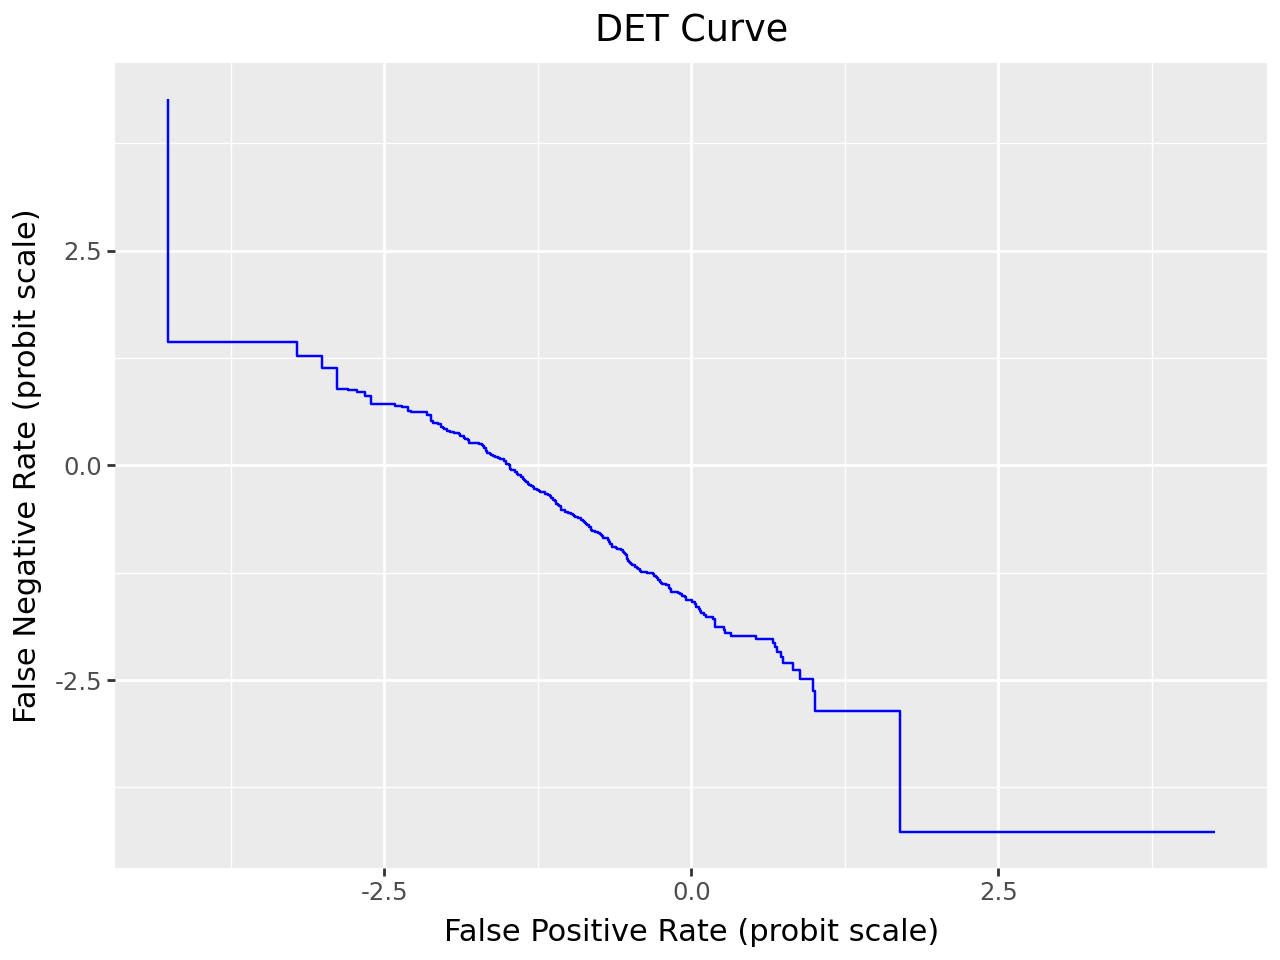

In [88]:
from scipy.stats import norm

#Get predicted probabilities for the positive class
p_hat = logistic_model.predict_proba(X_train_scaled)[:, 1]

#Compute the ROC curve to obtain FPR and TPR.
fpr, tpr, thresholds = roc_curve(y_train, p_hat)
fnr = 1-tpr # False Negative Rate

# To avoid infinities in the probit transformation, clip FPR and FNR
epsilon = 1e-5
fpr_clipped = np.clip(fpr, epsilon, 1-epsilon)
fnr_clipped = np.clip(fnr, epsilon, 1-epsilon)

# Apply the probit (inverse normal CDF) transformation.
det_x = norm.ppf(fpr_clipped)
det_y = norm.ppf(fnr_clipped)

# Create a DataFrame for plotting the DET curve.
det_df = pd.DataFrame({'det_x':det_x, 'det_y':det_y})

# Plot the DET curve using plotnine.
det_plot = (ggplot(det_df, aes(x='det_x', y='det_y')) +
            geom_line(color='blue') +
            labs(title='DET Curve', x='False Positive Rate (probit scale)', y='False Negative Rate (probit scale)')
            )
det_plot

Interpret the DET curve

Answer: The DET curve is showing the tradeoff between the FPR and FNR across different thresholds. Notably, the scales on the axis are in a probit scale. The graph can be used to select the 'detection' level to minimize the errors and their cost. 